In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

In [3]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "123456",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection
    
    
# con = PostgresConnection().getConnection()    

### Common Function to fetch Data from all tables 

In [8]:
#  select_stmt= is the SQL select query along with  table and column name    
def retrive_data_from_table(select_stmt): 
    con = PostgresConnection().getConnection()
    cur = con.cursor()
#     select_stmt = "SELECT t.payment_key , t.trans_type, t.bank_name " \
#                   "FROM ecomdb_star_schema.trans_dim t"
    cur.execute(select_stmt)
    records = cur.fetchall()
    return records

### Q9: Break down the total sales of items geographically (division-wise).
#### item1-> division1->total_sales
#### item1-> division2->total_sales

In [21]:
select_stmt = "select i.item_name, s.division, sum(f.total_price) "\
              "from ecomdb_star_schema.fact_table f "\
              "join ecomdb_star_schema.item_dim i on i.item_key=f.item_key "\
              "join ecomdb_star_schema.store_dim s on s.store_key = f.store_key "\
              "group by i.item_name, s.division "


#     "order by i.item_name,s.division"

records = retrive_data_from_table(select_stmt)
df_Q9 = pd.DataFrame(list(records), columns=['Item', 'Division', 'Total Sales'])
df_Q9['Total Sales'] = df_Q9['Total Sales'].astype('float64')
df_Q9


successfully connected to database


,Item,Division,Total Sales
0,100% Juice Box Variety 6.75 oz,BARISAL,23790.0
1,100% Juice Box Variety 6.75 oz,CHITTAGONG,64950.0
2,100% Juice Box Variety 6.75 oz,DHAKA,141195.0
3,100% Juice Box Variety 6.75 oz,KHULNA,37755.0
4,100% Juice Box Variety 6.75 oz,RAJSHAHI,38730.0
...,...,...,...
1808,Zoo Animal Cookies/Crackers,DHAKA,118286.0
1809,Zoo Animal Cookies/Crackers,KHULNA,35434.0
1810,Zoo Animal Cookies/Crackers,RAJSHAHI,37100.0
1811,Zoo Animal Cookies/Crackers,RANGPUR,25186.0


In [22]:
df_Q9.query('Item == "Zoo Animal Cookies/Crackers"', inplace = True)
df_Q9

,Item,Division,Total Sales
1806,Zoo Animal Cookies/Crackers,BARISAL,24178.0
1807,Zoo Animal Cookies/Crackers,CHITTAGONG,55762.0
1808,Zoo Animal Cookies/Crackers,DHAKA,118286.0
1809,Zoo Animal Cookies/Crackers,KHULNA,35434.0
1810,Zoo Animal Cookies/Crackers,RAJSHAHI,37100.0
1811,Zoo Animal Cookies/Crackers,RANGPUR,25186.0
1812,Zoo Animal Cookies/Crackers,SYLHET,14728.0


In [25]:
df_Q9.dtypes

Item            object
Division        object
Total Sales    float64
dtype: object

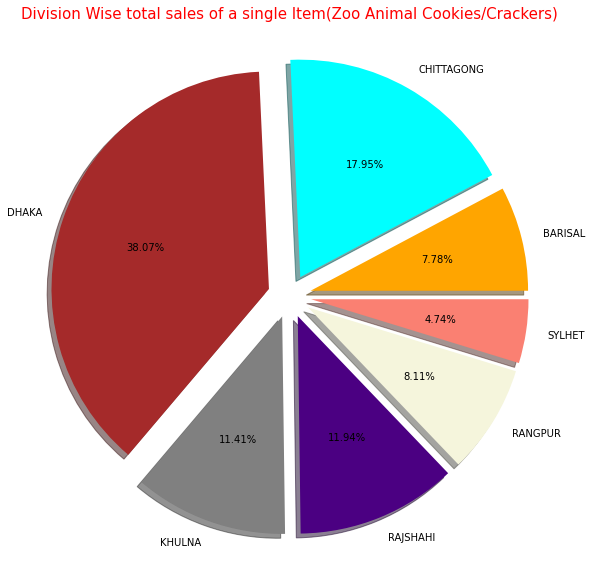

In [24]:
labels=df_Q9['Division']
data = df_Q9['Total Sales']
textprops = {"fontsize":10}
colors = ( "orange", "cyan", "brown", "grey", "indigo", "beige", "salmon")
plt.title('Division Wise total sales of a single Item(Zoo Animal Cookies/Crackers)', size = 15, loc='center', color='r')

plt.pie(data, labels=labels, shadow = True, textprops = textprops, colors=colors, autopct='%.2f%%',explode=(0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1))
plt.rcParams["figure.figsize"] = (15,10)
plt.show()
